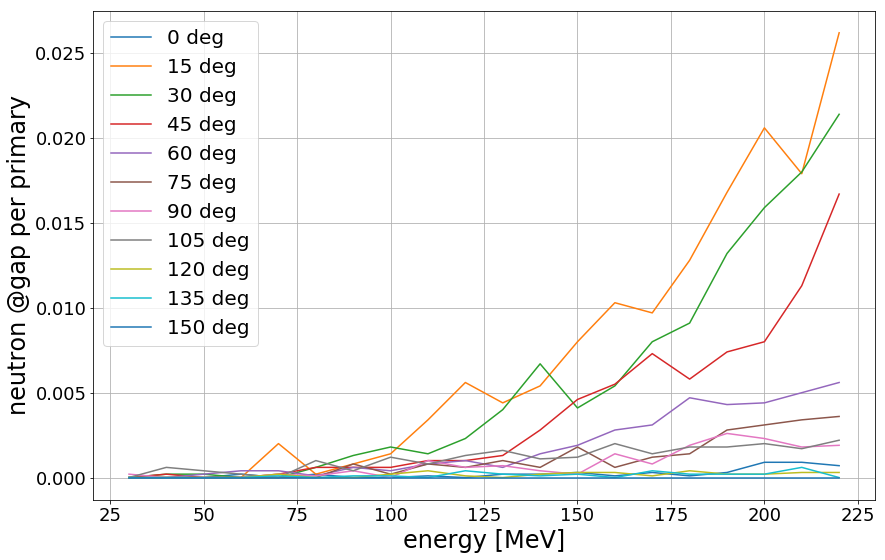

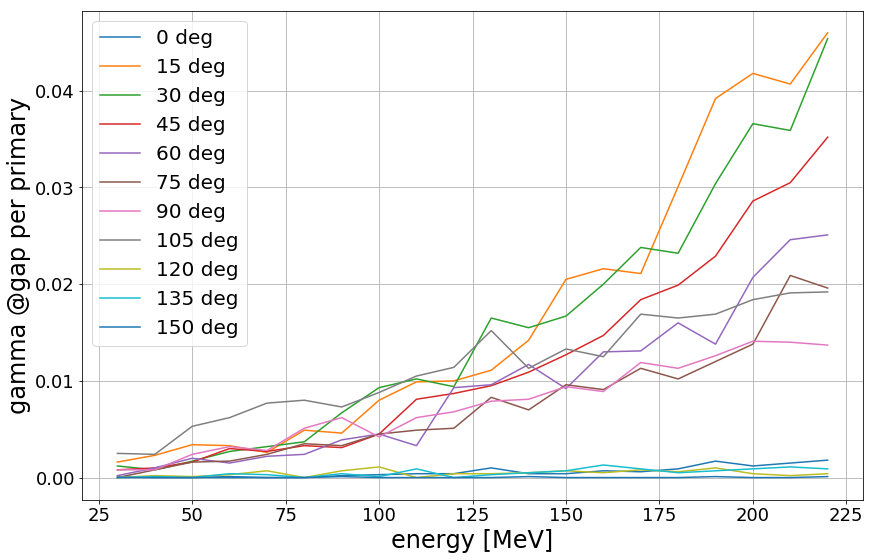

In [43]:

# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import math
import string
import glob

#librerie pyROOT per disegnare grafici
import ROOT
from ROOT import gROOT
from ROOT import TCanvas, TGraph, gPad, TF1, TF2 , kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TMath, TFormula, TGraphErrors, TTree, TDatime, TMath
from ROOT import TCanvas, TGraph, gPad, TF1, kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TMultiGraph, TH1F, TFile
from array import array

rootfile_list = glob.glob('*.root')
energy_list = list(range (30,230,10))
angle_list = list(range (0,165,15))


nperangle = []; gperangle = []
nevent = 10000

#print(len(energy_list), len(rootfile_list))

for angle in angle_list:
    neutron = []; gamma = [];
    for energy in energy_list:
        rootfile = 'hrpc_'+str(angle)+'deg_'+str(energy)+'MeV.root'
        #print(rootfile)
        input_root = TFile(rootfile)

        ntree = input_root.neutron_gap_TOT
        nbranch = ntree.GetBranch('PARTICLE_INCIDENT')
        neutron.append(float(nbranch.GetEntries())/nevent)

        gtree = input_root.gamma_gap_TOT
        gbranch = gtree.GetBranch('PARTICLE_INCIDENT')
        gamma.append(float(gbranch.GetEntries())/nevent)
        
    nperangle.append(neutron)
    gperangle.append(gamma)

#print(nperangle)
#print(gperangle)
    
#plot data
plt.figure(figsize=(14,9))

for i in range(len(angle_list)):
    #print(len(energy_list), len(nperangle[i]))
    errorbar(energy_list, nperangle[i],fmt = '-', label = ''+str(angle_list[i])+' deg')
 
# Plot set
#semilogy()
plt.grid()
plt.xlabel('energy [MeV]', fontsize=24)
plt.ylabel('neutron @gap per primary', fontsize=24)

tick_params(axis="x", labelsize=18)
tick_params(axis="y", labelsize=18)

#plt.xlim(10, 100)
#plt.ylim(0, 14)

plt.legend(loc='upper left', fontsize=20)
savefig('neutronRatio.jpg')

show()    
 
#plot data gamma
plt.figure(figsize=(14,9))

for i in range(len(angle_list)):
    #print(len(energy_list), len(nperangle[i]))
    errorbar(energy_list, gperangle[i],fmt = '-', label = ''+str(angle_list[i])+' deg')
 
# Plot set
#semilogy()
plt.grid()
plt.xlabel('energy [MeV]', fontsize=24)
plt.ylabel('gamma @gap per primary', fontsize=24)

tick_params(axis="x", labelsize=18)
tick_params(axis="y", labelsize=18)

#plt.xlim(10, 100)
#plt.ylim(0, 14)

plt.legend(loc='upper left', fontsize=20)
savefig('gammaRatio.jpg')

show()    
 
    
    